## Review Classification

In [1]:
#librairies

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#load data 

from olist.data import Olist
from olist.order import Order
from olist.utils import *
data = Olist().get_data()
orders = Order().get_training_data()

In [6]:
orders.columns

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price', 'freight_value',
       'distance_seller_customer', 'dim_is_low_review'],
      dtype='object')

### Baseline

- Define a new column `dim_is_low_review` (defined as reviews with 1 or 2 stars) in the order training dataset
- What's the probability of getting a low order review?
- Plot side by side distribution plot for each variable contained in `orders` object. What do you observe?

In [4]:
# Define target variable
def dim_is_low_review(d):
    if d < 3:
        return 1 
    else:
        return 0

orders['dim_is_low_review'] = orders['review_score'].apply(dim_is_low_review)

In [5]:
# Compute probability to get a low_star order
orders['dim_is_low_review'].sum() / orders.shape[0]

0.13169619728525542

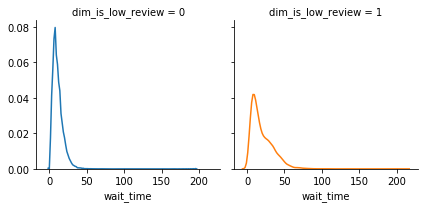

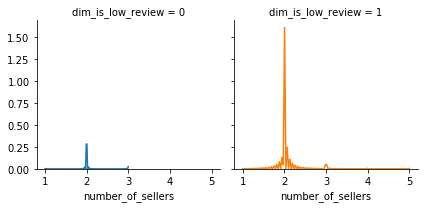

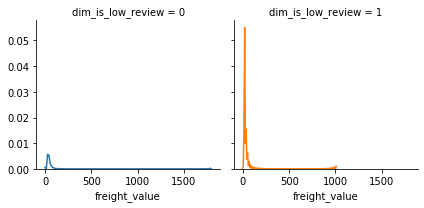

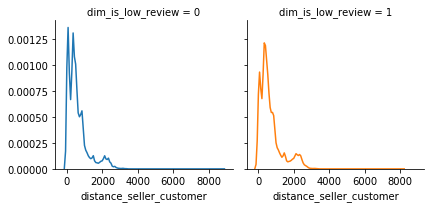

In [7]:
# Plot distribution graph per category
for var in [
    "wait_time",
    "number_of_sellers",
    "freight_value",
    "distance_seller_customer",
]:
    g = sns.FacetGrid(orders, hue="dim_is_low_review", col="dim_is_low_review")
    g.map(sns.kdeplot, var)

### First Model

In this section we implement a first model and measure its performances

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split 

In [34]:
# Pull training data
X = orders.drop(
    [
        "order_id",
        "dim_is_five_star",
        "review_score",
        "dim_is_one_star",
        "dim_is_low_review",
        "wait_time",
        "delay_vs_expected",
    ],
    axis=1,
)
y = orders["dim_is_low_review"]

In [35]:
X.columns

Index(['expected_wait_time', 'number_of_products', 'number_of_sellers',
       'price', 'freight_value', 'distance_seller_customer'],
      dtype='object')

In [15]:
# Train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 42, 
                                                    test_size=0.3) 

In [16]:
# Train a classifier
from sklearn.tree import DecisionTreeClassifier 
model_1 = DecisionTreeClassifier(max_depth = 100).fit(X_train, y_train) 
model_1_result = model_1.predict(X_test) 

In [36]:
# Output results 

print("Confusion matrix:")
print(confusion_matrix(y_test, model_1_result))
print("Accuracy score:")
print(accuracy_score(y_test, model_1_result))
print("Recall score:")
print(recall_score(y_test, model_1_result))
print("Precision score:")
print(precision_score(y_test, model_1_result))

Confusion matrix:
[[21576  3588]
 [ 3062   727]]
Accuracy score:
0.77031741097641
Recall score:
0.1918712061229876
Precision score:
0.16848203939745077


### More features

In this section we add features to our training set to measure our performance gain. 

In [37]:
# import review training_set
from olist.review import Review
reviews = Review().get_training_data()

In [38]:
reviews

,review_id,length_review,review_score,order_id,product_category_name
0,7bc2406110b926393aa56f80a40eba40,0,4,73fc7af87114b39712e6da79b0a377eb,esporte_lazer
1,80e641a11e56f04c1ad469d5645fdfde,0,5,a548910a1c6147796b98fdf73dbeba33,informatica_acessorios
2,228ce5500dc1d8e020d8d1322874b6f0,0,5,f9e4b658b201a9f2ecdecbb34bed034b,informatica_acessorios
3,e64fb393e7b32834bb789ff8bb30750e,37,5,658677c97b385a9be170737859d3511b,ferramentas_jardim
4,f7c4243c7fe1938f181bec41a392bdeb,100,5,8e6bfb81e283fa7e4f11123a3fb894f1,esporte_lazer
...,...,...,...,...,...
99425,f3897127253a9592a73be9bdfdf4ed7a,0,5,22ec9f0669f784db00fa86d035cf8602,brinquedos
99426,b3de70c89b1510c4cd3d0649fd302472,67,5,55d4004744368f5571d1f590031933e4,papelaria
99427,1adeb9d84d72fe4e337617733eb85149,0,4,7725825d039fc1f0ceb7635e3f7d9206,esporte_lazer
99428,be360f18f5df1e0541061c87021e6d93,198,1,f8bd3f2000c28c5342fedeb5e50f2e75,automotivo


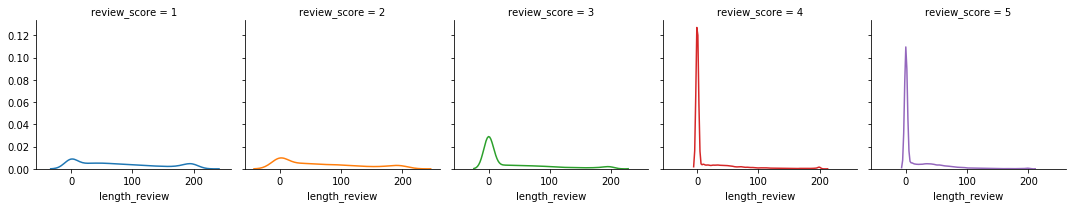

In [23]:
# plot distribution of length_review per review_score
plot_kde_plot(df=reviews,
              variable='length_review',
              dimension='review_score')

In [24]:
# merge orders and reviews dataframe
df_model_2 = orders.merge(reviews, on='order_id')

In [27]:
df_model_2.head(2)

,order_id,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score_x,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer,dim_is_low_review,review_id,length_review,review_score_y,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837,0,a54f0611adc9ed256b57ede6b6eb5114,170,4,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580,0,8d5266042046a06655c8db133d120ba5,20,4,perfumaria


In [39]:
# prepare training set
X2 = df_model_2.drop(
    [
        "dim_is_five_star",
        "dim_is_one_star",
        "review_score_x",
        "review_score_y",
        "order_id",
        "review_id",
        "dim_is_low_review",
        "wait_time",
        "delay_vs_expected",
        "product_category_name"
    ],
    axis=1,
)
X2 = X2.join(pd.get_dummies(df_model_2["product_category_name"]))
y2 = df_model_2["dim_is_low_review"]

In [40]:
# split train and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, 
                                                        y2, 
                                                        random_state = 42, 
                                                        test_size=0.3) 

In [41]:
# Fit model_2
model_2 = DecisionTreeClassifier(max_depth = 100).fit(X2_train, y2_train) 
model_2_result = model_2.predict(X2_test) 

In [43]:
# Output results 

print("Confusion matrix:")
print(confusion_matrix(y2_test, model_2_result))
print("Accuracy score:")
print(accuracy_score(y2_test, model_2_result))
print("Recall score:")
print(recall_score(y2_test, model_2_result))
print("Precision score:")
print(precision_score(y_test, model_1_result))

Confusion matrix:
[[22761  2860]
 [ 2609  1299]]
Accuracy score:
0.8147922381387789
Recall score:
0.33239508700102355
Precision score:
0.16848203939745077


### Auto ML

In [44]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations=5,
                      population_size=50,
                      verbosity=2)
tpot.fit(X2_train, y2_train)
print(tpot.score(X2_test, y2_test))
tpot.export('tpot_review_classification.py')